
## Load packages:

In [1]:
library(dplyr)
library(ggplot2)
library(reshape2)
library(maps)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Part 1: Data
The mental-illnesses-prevalence.csv, depressive.disorders.prevalence.by.age.csv, schizophrenia.prevalence.by.age.csv data sets can be downloaded from the following source:

Saloni Dattani, Lucas Rodés-Guirao, Hannah Ritchie and Max Roser (2023) - "Mental Health". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/mental-health' [Online Resource]

contain respectively percentages of mental illnesses worldwide which in technical terms is called prevalence and percentages of depressive disorders and schizophrenia by age range.

## Part 2 : Research question
We want to highlight that in Africa and Greenland the percentage of depressed people is higher than in other continents and that this percentage tends to grow with increasing age range. Instead, the percentage of schizophrenic people in Africa is lower than in other continents, while the distribution of ages at which schizophrenia manifests itself assumes a normal trend (Gauss curve). It is also noted that the prevalence of other mental illnesses is similar across all continents.

**Load data:**

In [2]:
mental.illnesses.prevalence <- read.csv("/kaggle/input/mental-health/mental-illnesses-prevalence.csv")
depressive.disorders.prevalence.by.age <- read.csv("/kaggle/input/mental-health/depressive-disorders-prevalence-by-age.csv")
schizophrenia.prevalence.by.age <- read.csv("/kaggle/input/mental-health/schizophrenia-prevalence-by-age.csv")
world_population <- read.csv("/kaggle/input/world-population-dataset/world_population.csv")

head(mental.illnesses.prevalence)

,Entity,Code,Year,Schizophrenia.disorders..share.of.population....Sex..Both...Age..Age.standardized,Depressive.disorders..share.of.population....Sex..Both...Age..Age.standardized,Anxiety.disorders..share.of.population....Sex..Both...Age..Age.standardized,Bipolar.disorders..share.of.population....Sex..Both...Age..Age.standardized,Eating.disorders..share.of.population....Sex..Both...Age..Age.standardized
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,AFG,1990,0.2232058,4.996118,4.713314,0.7030231,0.1277000
2,Afghanistan,AFG,1991,0.2224538,4.989290,4.702100,0.7020688,0.1232559
3,Afghanistan,AFG,1992,0.2217512,4.981346,4.683743,0.7007920,0.1188441
4,Afghanistan,AFG,1993,0.2209872,4.976958,4.673549,0.7000869,0.1150889
5,Afghanistan,AFG,1994,0.2201830,4.977782,4.670810,0.6998978,0.1118147
6,Afghanistan,AFG,1995,0.2194088,4.978228,4.668100,0.6997684,0.1085070


## Part 3 : EDA

In [3]:
world_map <- map_data("world")
world_map$region[world_map$region=="USA"] <- "United States"
world_map$region[world_map$region=="Democratic Republic of the Congo"] <- "Democratic Republic of Congo"
world_map$region[world_map$region=="UK"] <- "United Kingdom" 



In [4]:
colnames(mental.illnesses.prevalence)[4] <-"Schizophrenia.disorders"
colnames(mental.illnesses.prevalence)[5] <-"Depressive.disorders"
colnames(mental.illnesses.prevalence)[6] <-"Anxiety.disorders"
colnames(mental.illnesses.prevalence)[7] <-"Bipolar.disorders"
colnames(mental.illnesses.prevalence)[8] <-"Eating.disorders"


In [5]:
print(colSums(is.na(mental.illnesses.prevalence)))

                 Entity                    Code                    Year 
                      0                       0                       0 
Schizophrenia.disorders    Depressive.disorders       Anxiety.disorders 
                      0                       0                       0 
      Bipolar.disorders        Eating.disorders 
                      0                       0 


In [6]:
summary(mental.illnesses.prevalence)

    Entity              Code                Year      Schizophrenia.disorders
 Length:6420        Length:6420        Min.   :1990   Min.   :0.1884         
 Class :character   Class :character   1st Qu.:1997   1st Qu.:0.2423         
 Mode  :character   Mode  :character   Median :2004   Median :0.2735         
                                       Mean   :2004   Mean   :0.2666         
                                       3rd Qu.:2012   3rd Qu.:0.2866         
                                       Max.   :2019   Max.   :0.4620         
 Depressive.disorders Anxiety.disorders Bipolar.disorders Eating.disorders 
 Min.   :1.522        Min.   :1.880     Min.   :0.1817    Min.   :0.04478  
 1st Qu.:3.080        1st Qu.:3.426     1st Qu.:0.5209    1st Qu.:0.09642  
 Median :3.637        Median :3.940     Median :0.5793    Median :0.14415  
 Mean   :3.767        Mean   :4.102     Mean   :0.6370    Mean   :0.19566  
 3rd Qu.:4.366        3rd Qu.:4.564     3rd Qu.:0.8444    3rd Qu.:0.25117 

In [7]:
df<-world_population %>%
  select(CCA3,Continent)

colnames(df)[1] <- "Code"

mental.illnesses.prevalence <-merge(mental.illnesses.prevalence,df, by="Code")

In [8]:
df <- melt(mental.illnesses.prevalence, id=c("Code","Entity","Year","Continent"))

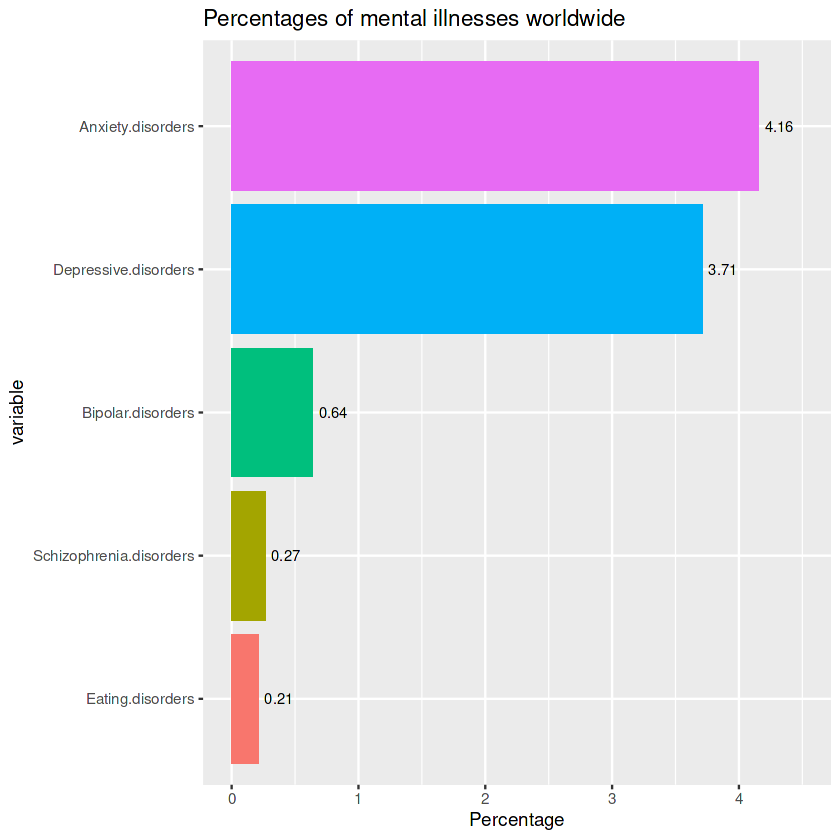

In [9]:
df %>%
  filter(Year==2019) %>%
  group_by(variable) %>%
  summarise(mean_c=mean(value)) %>%
  mutate(variable=reorder(variable,mean_c)) %>%
  ggplot(aes(variable,mean_c, fill=variable))+
  geom_bar(stat = "identity")+
  geom_text(aes(label=round(mean_c,2)), hjust=-0.2, size=3)+
  coord_flip()+
  ylim(0,4.5)+
  guides(fill="none")+
  ylab("Percentage")+
  ggtitle("Percentages of mental illnesses worldwide")

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


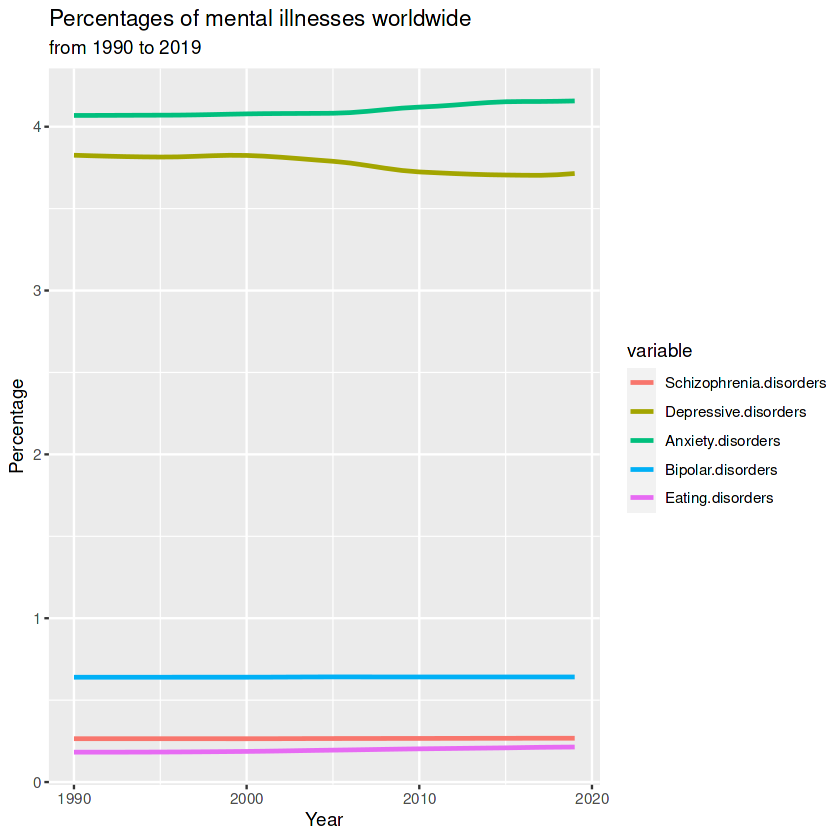

In [10]:
df %>%
  group_by(Year,variable) %>%
  summarise(mean_c=mean(value)) %>%
  ggplot(aes(Year,mean_c, colour=variable))+
  geom_line(linewidth=1)+
  ylab("Percentage")+
  ggtitle("Percentages of mental illnesses worldwide", subtitle = "from 1990 to 2019")
  

### Depression:

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


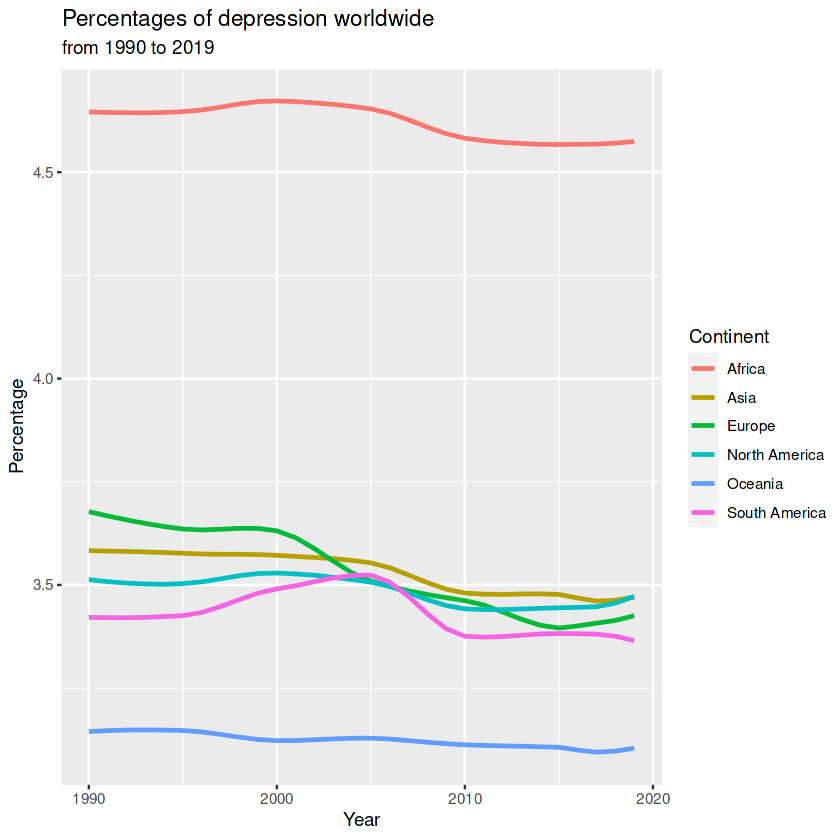

In [11]:
df %>%
  filter(variable=="Depressive.disorders") %>%
  group_by(Year,Continent) %>%
  summarise(mean_c=mean(value)) %>%
  ggplot(aes(Year,mean_c, colour=Continent))+
  geom_line(linewidth=1)+
  ylab("Percentage")+
  ggtitle("Percentages of depression worldwide", subtitle = "from 1990 to 2019")
  

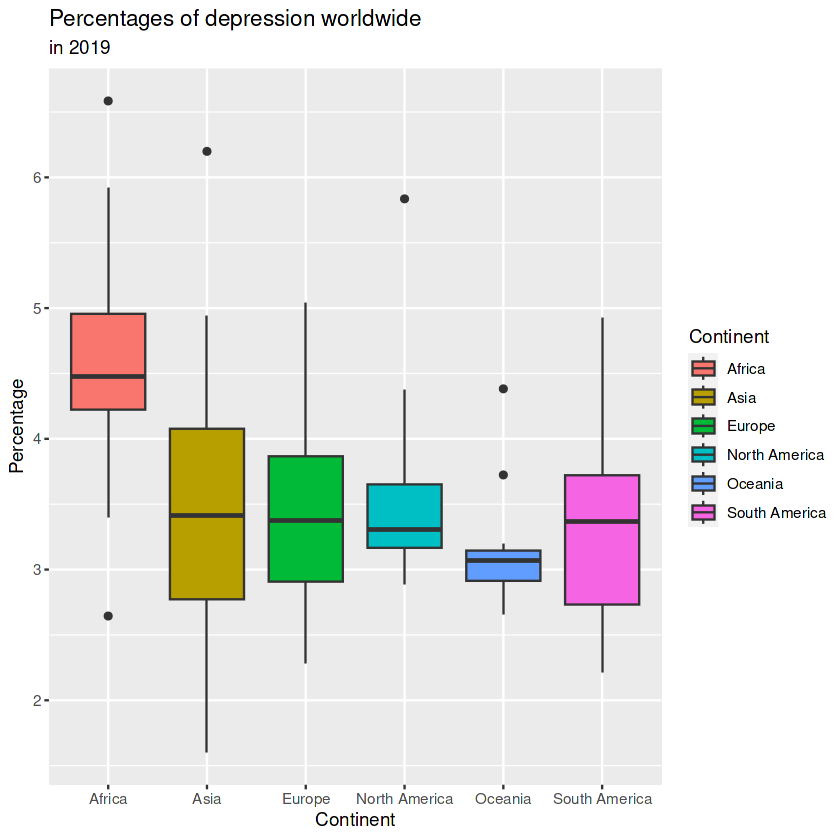

In [12]:
df %>%
  filter(variable=="Depressive.disorders",Year==2019) %>%
  ggplot(aes(Continent,value, fill=Continent))+
  geom_boxplot()+
  ylab("Percentage")+
  ggtitle("Percentages of depression worldwide", subtitle = "in 2019")
  

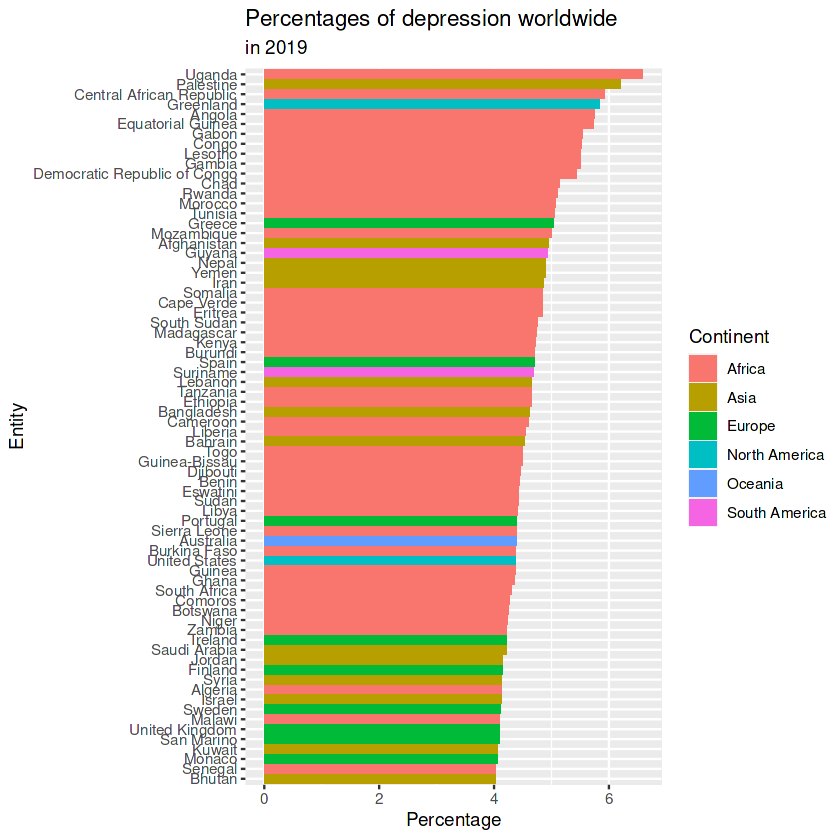

In [13]:
df %>%
  filter(variable=="Depressive.disorders", Year==2019, value>4) %>%
  mutate(Entity=reorder(Entity,value)) %>%
  ggplot(aes(Entity,value, fill=Continent))+
  geom_bar(stat = "identity") +
  coord_flip()+
  ylab("Percentage")+
  ggtitle("Percentages of depression worldwide", subtitle = "in 2019")
  

In [14]:
dataset<-mental.illnesses.prevalence %>%
  filter(Year==2019) %>%
  select(Entity,Depressive.disorders)

colnames(dataset)[1] <- "region"



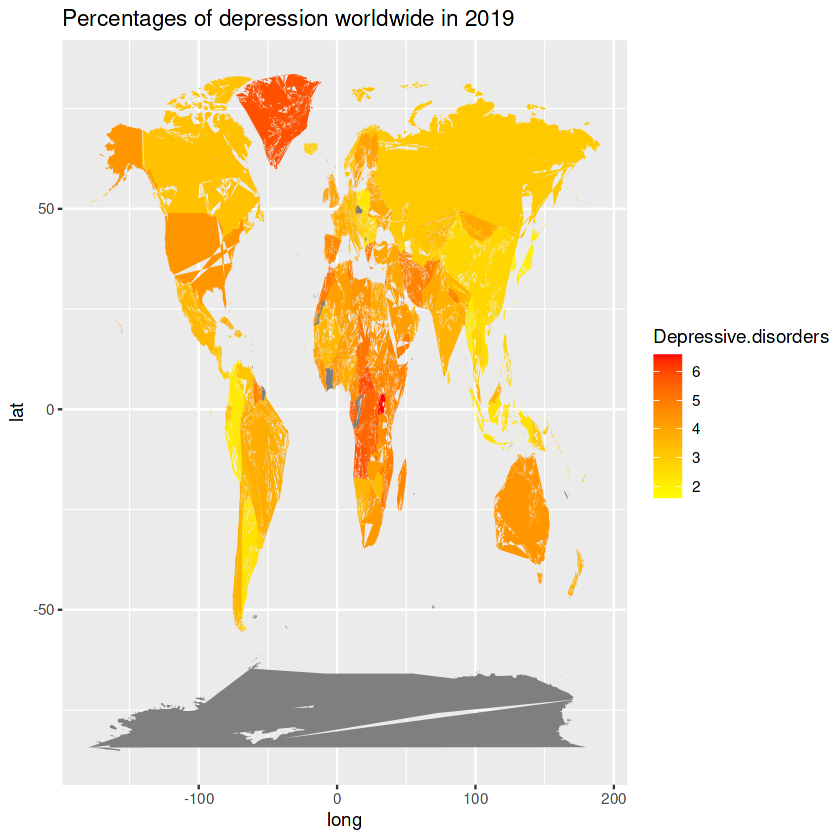

In [15]:

merged_data <- merge(world_map, dataset, by.x = "region", by.y = "region", all.x = TRUE)


merged_data %>%
  ggplot() +
  geom_polygon( aes(x = long, y = lat, group = group, fill = Depressive.disorders)) +
  scale_fill_gradient(low = "yellow", high = "red")+ 
  labs(title = "Percentages of depression worldwide in 2019")

In [16]:
colnames(depressive.disorders.prevalence.by.age)[4] <-"5-14"
colnames(depressive.disorders.prevalence.by.age)[5] <-"15-19"
colnames(depressive.disorders.prevalence.by.age)[6] <-"20-24"
colnames(depressive.disorders.prevalence.by.age)[7] <-"25-29"
colnames(depressive.disorders.prevalence.by.age)[8] <-"30-34"
colnames(depressive.disorders.prevalence.by.age)[9] <-"35-39"
colnames(depressive.disorders.prevalence.by.age)[10] <-"40-44"
colnames(depressive.disorders.prevalence.by.age)[11] <-"45-49"
colnames(depressive.disorders.prevalence.by.age)[12] <-"50-54"
colnames(depressive.disorders.prevalence.by.age)[13] <-"55-59"
colnames(depressive.disorders.prevalence.by.age)[14] <-"60-64"
colnames(depressive.disorders.prevalence.by.age)[15] <-"65-69"
colnames(depressive.disorders.prevalence.by.age)[16] <-"70.."

In [17]:
depressive.disorders.prevalence.by.age <- depressive.disorders.prevalence.by.age[,-c(17:18)]

In [18]:
df1 <- melt(depressive.disorders.prevalence.by.age, id=c("Entity","Code","Year"))

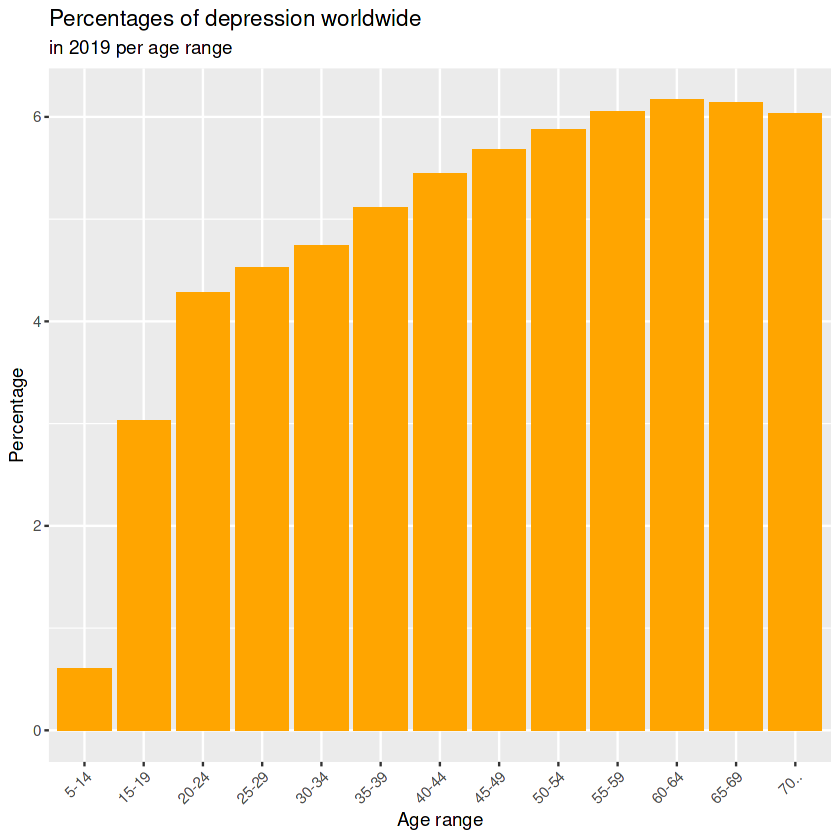

In [19]:
df1 %>%
  filter(Year==2019) %>%
  group_by(variable) %>%
  summarise(mean_c=mean(value)) %>%
  ggplot(aes(variable,mean_c))+
  geom_bar(stat = "identity", fill="orange")+
  theme(axis.text.x = element_text(angle=45,hjust=1))+
  ylab("Percentage")+
  xlab("Age range")+
  ggtitle("Percentages of depression worldwide", subtitle = "in 2019 per age range")

### Schizophrenia


`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


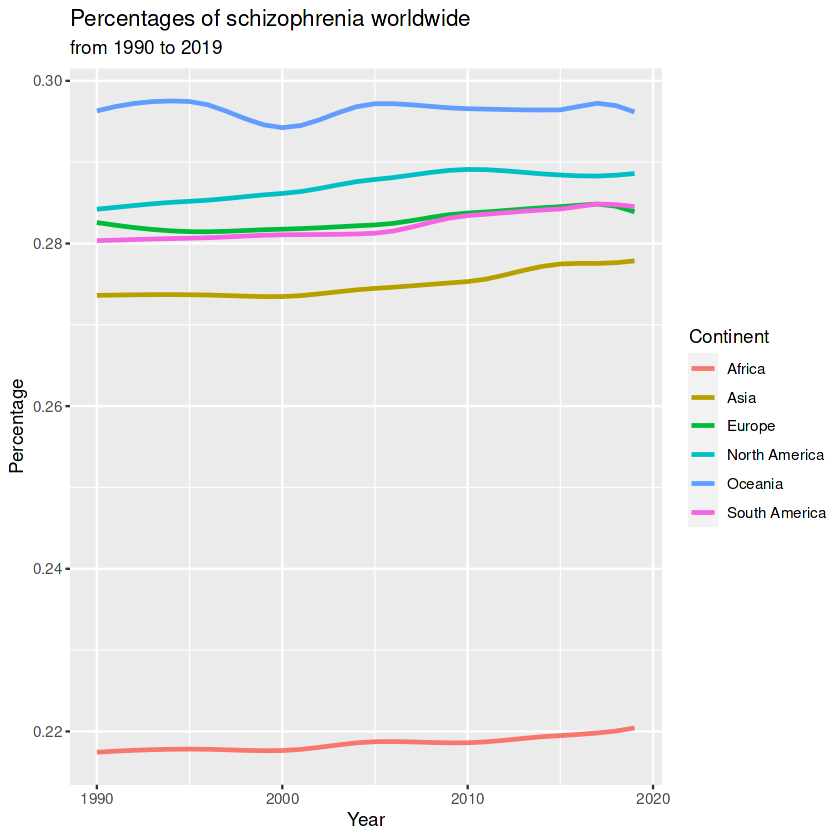

In [20]:
df %>%
  filter(variable=="Schizophrenia.disorders") %>%
  group_by(Year,Continent) %>%
  summarise(mean_c=mean(value)) %>%
  ggplot(aes(Year,mean_c, colour=Continent))+
  geom_line(linewidth=1)+
  ylab("Percentage")+
  ggtitle("Percentages of schizophrenia worldwide", subtitle = "from 1990 to 2019")
  

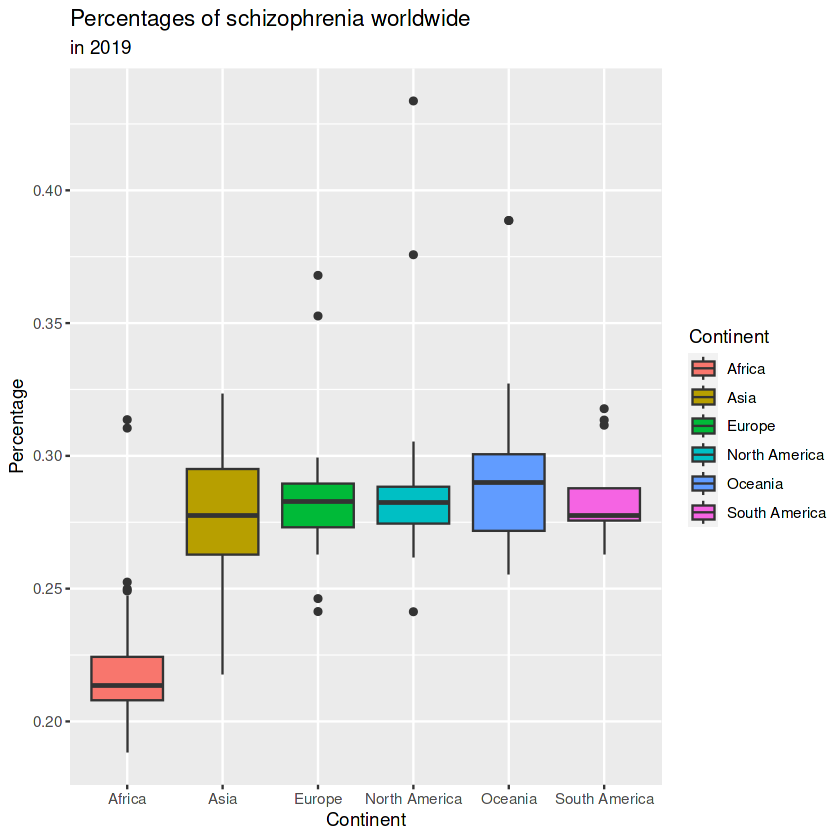

In [21]:
df %>%
  filter(variable=="Schizophrenia.disorders",Year==2019) %>%
  ggplot(aes(Continent,value, fill=Continent))+
  geom_boxplot()+
  ylab("Percentage")+
  ggtitle("Percentages of schizophrenia worldwide", subtitle = "in 2019")
  

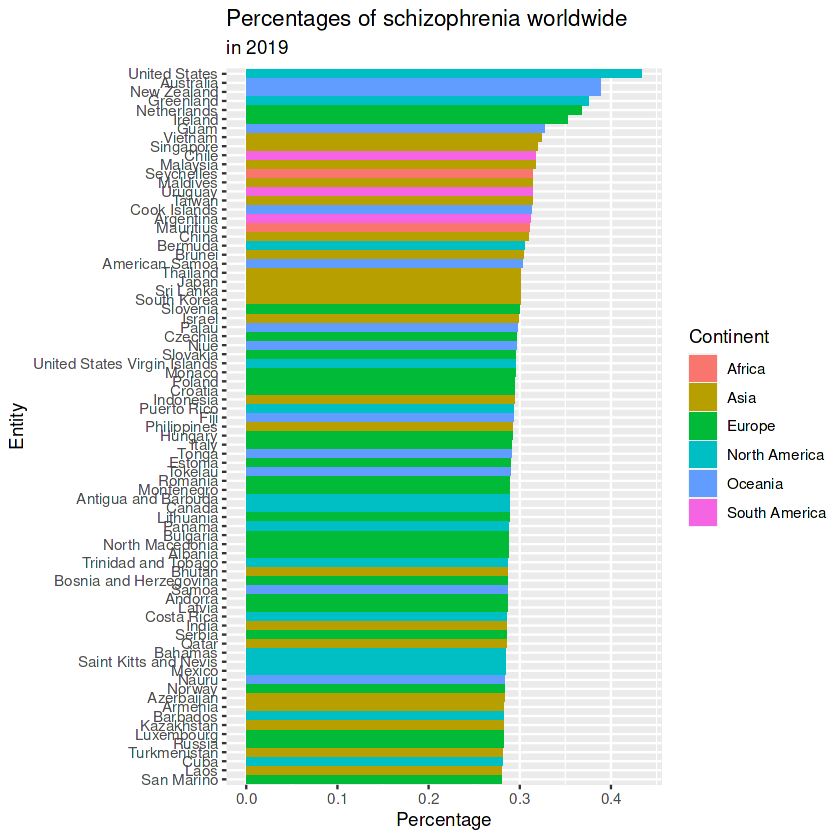

In [22]:
df %>%
  filter(variable=="Schizophrenia.disorders", Year==2019, value>0.28) %>%
  mutate(Entity=reorder(Entity,value)) %>%
  ggplot(aes(Entity,value, fill=Continent))+
  geom_bar(stat = "identity") +
  coord_flip()+
  ylab("Percentage")+
  ggtitle("Percentages of schizophrenia worldwide", subtitle = "in 2019")
  

In [23]:
dataset<-mental.illnesses.prevalence %>%
  filter(Year==2019) %>%
  select(Entity,Schizophrenia.disorders)

colnames(dataset)[1] <- "region"



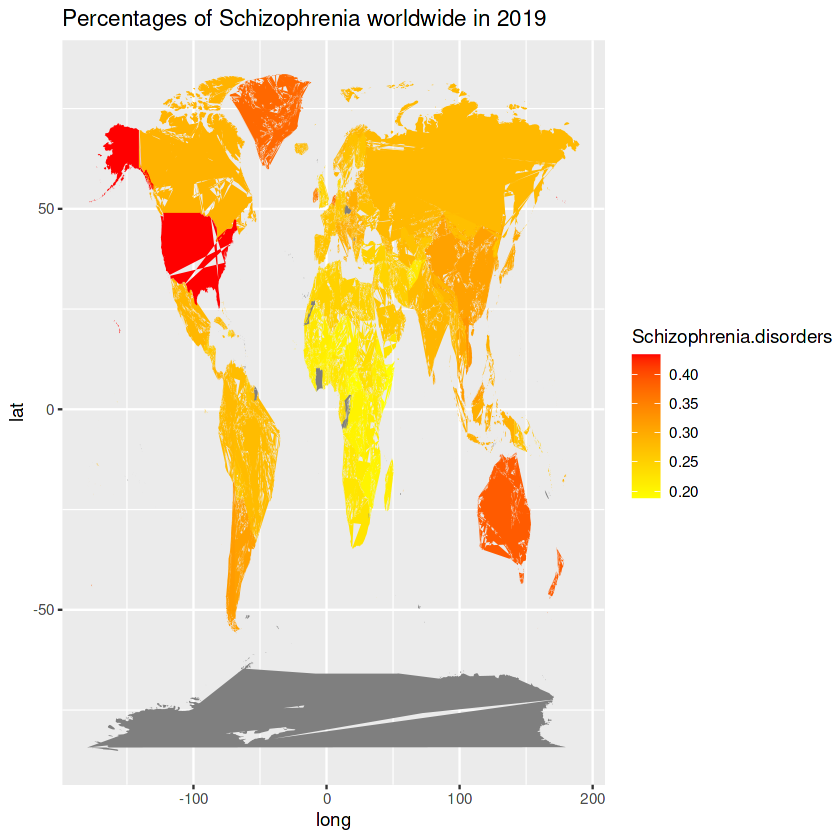

In [24]:
# Unisci i dati e la mappa
merged_data <- merge(world_map, dataset, by.x = "region", by.y = "region", all.x = TRUE)

# Traccia la mappa
merged_data %>%
  ggplot() +
  geom_polygon( aes(x = long, y = lat, group = group, fill = Schizophrenia.disorders)) +
  scale_fill_gradient(low = "yellow", high = "red")+ 
  labs(title = "Percentages of Schizophrenia worldwide in 2019")

In [25]:
colnames(schizophrenia.prevalence.by.age)[4] <-"5-14"
colnames(schizophrenia.prevalence.by.age)[5] <-"15-19"
colnames(schizophrenia.prevalence.by.age)[6] <-"20-24"
colnames(schizophrenia.prevalence.by.age)[7] <-"25-29"
colnames(schizophrenia.prevalence.by.age)[8] <-"30-34"
colnames(schizophrenia.prevalence.by.age)[9] <-"35-39"
colnames(schizophrenia.prevalence.by.age)[10] <-"40-44"
colnames(schizophrenia.prevalence.by.age)[11] <-"45-49"
colnames(schizophrenia.prevalence.by.age)[12] <-"50-54"
colnames(schizophrenia.prevalence.by.age)[13] <-"55-59"
colnames(schizophrenia.prevalence.by.age)[14] <-"60-64"
colnames(schizophrenia.prevalence.by.age)[15] <-"65-69"
colnames(schizophrenia.prevalence.by.age)[16] <-"70.."

In [26]:
schizophrenia.prevalence.by.age <- schizophrenia.prevalence.by.age[,-c(17:18)]

In [27]:
df1 <- melt(schizophrenia.prevalence.by.age, id=c("Entity","Code","Year"))

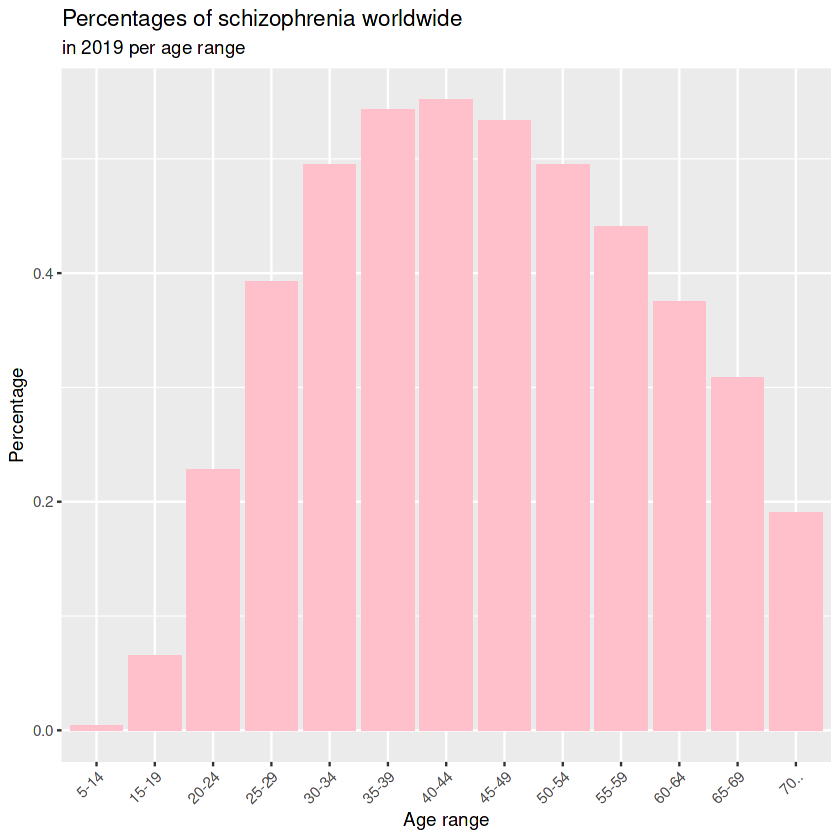

In [28]:
df1 %>%
  filter(Year==2019) %>%
  group_by(variable) %>%
  summarise(mean_c=mean(value)) %>%
  ggplot(aes(variable,mean_c))+
  geom_bar(stat = "identity", fill="pink")+
  theme(axis.text.x = element_text(angle=45,hjust=1))+
  ylab("Percentage")+
  xlab("Age range")+
  ggtitle("Percentages of schizophrenia worldwide", subtitle = "in 2019 per age range")